In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from scipy.stats import shapiro,kstest
import statsmodels.api as sm

# Data Gathering

In [2]:
df = pd.read_csv('medical_raw_data.csv')
df.head()

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [3]:

# df.columns.get_loc('TotalCharge')

In [4]:
# df.columns.get_loc('Additional_charges')

In [5]:
# df.columns.values[43] = "Additional_charges"
# df.columns.values[44] = "TotalCharge"

In [6]:
# swap_list = ['TotalCharge','Additional_charges']
# df=df.reindex(columns=swap_list)

In [7]:
# def swap_columns(df,col1,col2):
#     col_list = list(df.columns)
#     x,y = col_list.index(col1),col_list.index(col2)
#     col_list[y],col_list[x]=col_list[x],col_list[y]
#     df=df[col_list]
#     return df

In [8]:
# swap_columns(df,'Additional_charges','TotalCharge')

In [9]:
df.rename(columns={'Additional_charges':'Total_Charges','TotalCharge':'Additional_charges'},inplace =True)

In [10]:
df

,Unnamed: 0,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,Additional_charges,Total_Charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
1,2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
2,3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
3,4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
4,5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,...,6651.241294,8927.642189,3,2,2,3,4,3,4,2
9996,9997,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,...,7851.522660,28507.147340,3,3,4,2,5,3,4,4
9997,9998,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,...,7725.953391,15281.214660,3,3,3,4,4,2,3,2
9998,9999,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,...,8462.831883,7781.678412,5,5,3,4,4,3,4,3


# EDA

In [11]:
df.isna().sum()/len(df)*100

Unnamed: 0             0.00
CaseOrder              0.00
Customer_id            0.00
Interaction            0.00
UID                    0.00
City                   0.00
State                  0.00
County                 0.00
Zip                    0.00
Lat                    0.00
Lng                    0.00
Population             0.00
Area                   0.00
Timezone               0.00
Job                    0.00
Children              25.88
Age                   24.14
Education              0.00
Employment             0.00
Income                24.64
Marital                0.00
Gender                 0.00
ReAdmis                0.00
VitD_levels            0.00
Doc_visits             0.00
Full_meals_eaten       0.00
VitD_supp              0.00
Soft_drink            24.67
Initial_admin          0.00
HighBlood              0.00
Stroke                 0.00
Complication_risk      0.00
Overweight             9.82
Arthritis              0.00
Diabetes               0.00
Hyperlipidemia      

In [12]:
df['Children'].isna().sum()

2588

In [13]:
df.drop(['Unnamed: 0','CaseOrder'],axis=1,inplace=True)
df.drop(['Customer_id','Interaction','UID'],axis=1,inplace=True)
df.drop(['Marital','Employment','City','Education','County','State','Job','Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8','Zip','Lat','Lng','Population','Timezone',],axis=1,inplace=True)

In [14]:
df.dtypes

Area                   object
Children              float64
Age                   float64
Income                float64
Gender                 object
ReAdmis                object
VitD_levels           float64
Doc_visits              int64
Full_meals_eaten        int64
VitD_supp               int64
Soft_drink             object
Initial_admin          object
HighBlood              object
Stroke                 object
Complication_risk      object
Overweight            float64
Arthritis              object
Diabetes               object
Hyperlipidemia         object
BackPain               object
Anxiety               float64
Allergic_rhinitis      object
Reflux_esophagitis     object
Asthma                 object
Services               object
Initial_days          float64
Additional_charges    float64
Total_Charges         float64
dtype: object

# Null values handaling

In [15]:
df['Soft_drink'].fillna(df['Soft_drink'].mode()[0],inplace=True)

In [16]:
df['Soft_drink'].isna().sum()

0

# Encoding

In [17]:
df

,Area,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Additional_charges,Total_Charges
0,Suburban,1.0,53.0,86575.93,Male,No,17.802330,6,0,0,...,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420
1,Urban,3.0,51.0,46805.99,Female,No,18.994640,4,2,1,...,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120
2,Suburban,3.0,53.0,14370.14,Female,No,17.415889,4,1,0,...,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460
3,Suburban,0.0,78.0,39741.49,Male,No,17.420079,4,1,0,...,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350
4,Rural,NaN,22.0,1209.56,Female,No,16.870524,5,0,2,...,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Urban,NaN,25.0,45967.61,Male,No,16.481612,4,2,1,...,No,No,1.0,No,Yes,No,Intravenous,51.561217,6651.241294,8927.642189
9996,Urban,4.0,87.0,14983.02,Male,Yes,18.451601,5,0,0,...,No,No,0.0,No,No,Yes,CT Scan,68.668237,7851.522660,28507.147340
9997,Rural,3.0,NaN,65917.81,Female,Yes,15.752751,4,2,0,...,No,No,1.0,Yes,No,No,Intravenous,NaN,7725.953391,15281.214660
9998,Rural,3.0,43.0,29702.32,Male,Yes,21.956305,5,2,1,...,No,Yes,0.0,No,No,No,Blood Work,63.356903,8462.831883,7781.678412


In [18]:

df['Area'].replace({'Rural':0, 'Suburban': 1, 'Urban': 2},inplace=True)












In [19]:
# df2['Employment'].replace({'Full Time': 3,
#  'Student': 0,
#  'Part Time': 1,
#  'Unemployed': 2,
#  'Retired': 4},inplace=True)

In [20]:
# df2['Marital'].replace({'Widowed': 3,
#  'Married': 1,
#  'Separated': 2,
#  'Never Married': 0,
#  'Divorced': 2},inplace=True)

In [21]:
df['Gender'].replace({'Female': 0, 'Male': 1, 'Prefer not to answer': 2},inplace = True)

In [22]:
df['ReAdmis'].replace({'No': 0, 'Yes': 1},inplace = True)

In [23]:
df['Soft_drink'].replace({'No': 0, 'Yes': 1},inplace = True)

In [24]:
df['Initial_admin'].replace({'Emergency Admission': 0,
 'Elective Admission': 1,
 'Observation Admission': 2},inplace=True)

In [25]:

df['HighBlood'].replace({'No': 0, 'Yes': 1},inplace = True)

In [26]:
df['Stroke'].replace({'No': 0, 'Yes': 1},inplace = True)

In [27]:
df['Complication_risk'].replace({'Medium': 1, 'High': 2, 'Low': 0},inplace =True)

In [28]:

df['Arthritis'].replace({'No': 0, 'Yes': 1},inplace=True)








In [29]:
df['Diabetes'].replace({'No': 0, 'Yes': 1},inplace=True)

In [30]:
df['Hyperlipidemia'].replace({'No': 0, 'Yes': 1},inplace=True)

In [31]:
df['BackPain'].replace({'No': 0, 'Yes': 1},inplace=True)

In [32]:
df['Allergic_rhinitis'].replace({'No': 0, 'Yes': 1},inplace=True)

In [33]:
df['Reflux_esophagitis'].replace({'No': 0, 'Yes': 1},inplace=True)

In [34]:

df['Asthma'].replace({'No': 0, 'Yes': 1},inplace=True)

In [35]:
df['Services'].replace({'Blood Work': 0, 'Intravenous': 1, 'CT Scan': 2, 'MRI': 3},inplace=True)

In [36]:
# df2['Employment'].replace({'Full Time': 3,
#  'Student': 0,
#  'Part Time': 1,
#  'Unemployed': 2,
#  'Retired': 4},inplace=True)

# df2['Marital'].replace({'Widowed': 2045,
#  'Married': 2023,
#  'Separated': 1987,
#  'Never Married': 1984,
#  'Divorced': 1961},inplace=True)

# df2['Gender'].replace({'Female': 0, 'Male': 1, 'Prefer not to answer': 2},inplace = True)

# df2['ReAdmis'].replace({'No': 0, 'Yes': 1},inplace = True)

# df2['Soft_drink'].replace({'No': 0, 'Yes': 1},inplace = True)

# df2['Initial_admin'].replace({'Emergency Admission': 0,
#  'Elective Admission': 1,
#  'Observation Admission': 2},inplace=True)


# df2['HighBlood'].replace({'No': 0, 'Yes': 1},inplace = True)

# df2['Stroke'].replace({'No': 0, 'Yes': 1},inplace = True)

# df2['Complication_risk'].replace({'Medium': 1, 'High': 2, 'Low': 0},inplace =True)


# df2['Arthritis'].replace({'No': 0, 'Yes': 1},inplace=True)

# df2['Diabetes'].replace({'No': 0, 'Yes': 1},inplace=True)

# df2['Hyperlipidemia'].replace({'No': 0, 'Yes': 1},inplace=True)

# df2['BackPain'].replace({'No': 0, 'Yes': 1},inplace=True)

# df2['Allergic_rhinitis'].replace({'No': 0, 'Yes': 1},inplace=True)

# df2['Reflux_esophagitis'].replace({'No': 0, 'Yes': 1},inplace=True)


# df2['Asthma'].replace({'No': 0, 'Yes': 1},inplace=True)


# df2['Services'].replace({'Blood Work': 0, 'Intravenous': 1, 'CT Scan': 2, 'MRI': 3},inplace=True)


# nullvalue handling

In [37]:
# df2['Overweight'].fillna(df2['Overweight'].mean(),inplace=True)
# df2['Anxiety'].fillna(df2['Anxiety'].mean(),inplace=True)
# df2['Initial_days'].fillna(df2['Initial_days'].mean(),inplace=True)
# df2['Income'].fillna(df['Income'].mean(),inplace=True)
# df2['Age'].fillna(df['Income'].mean(),inplace=True)
# df2['Children'].fillna(df['Income'].mean(),inplace=True)

In [38]:
impute = KNNImputer()
arr = impute.fit_transform(df)
df = pd.DataFrame(arr,columns=df.columns)
df

,Area,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Additional_charges,Total_Charges
0,1.0,1.0,53.0,86575.93,1.0,0.0,17.802330,6.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.585770,3191.048774,17939.403420
1,2.0,3.0,51.0,46805.99,0.0,0.0,18.994640,4.0,2.0,1.0,...,0.0,0.0,0.6,0.0,1.0,0.0,1.0,15.129562,4214.905346,17612.998120
2,1.0,3.0,53.0,14370.14,0.0,0.0,17.415889,4.0,1.0,0.0,...,0.0,0.0,0.4,0.0,0.0,0.0,0.0,4.772177,2177.586768,17505.192460
3,1.0,0.0,78.0,39741.49,1.0,0.0,17.420079,4.0,1.0,0.0,...,0.0,0.0,0.8,0.0,1.0,1.0,0.0,1.714879,2465.118965,12993.437350
4,0.0,1.4,22.0,1209.56,0.0,0.0,16.870524,5.0,0.0,2.0,...,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.254807,1885.655137,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,1.6,25.0,45967.61,1.0,0.0,16.481612,4.0,2.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,51.561217,6651.241294,8927.642189
9996,2.0,4.0,87.0,14983.02,1.0,1.0,18.451601,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,68.668237,7851.522660,28507.147340
9997,0.0,3.0,71.0,65917.81,0.0,1.0,15.752751,4.0,2.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,60.176523,7725.953391,15281.214660
9998,0.0,3.0,43.0,29702.32,1.0,1.0,21.956305,5.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,63.356903,8462.831883,7781.678412


In [39]:
df['Age'].isna().sum()

0

In [40]:
df.isna().sum()

Area                  0
Children              0
Age                   0
Income                0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
Additional_charges    0
Total_Charges         0
dtype: int64

# outlier handling

In [41]:
# listt = []
# for i in df.columns:
#     if df[i].dtype=='int64':
#         listt.append(i)
#     elif df[i].dtype == 'float64':
#         listt.append(i)
# listt

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


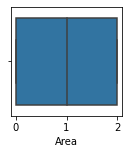

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


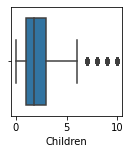

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


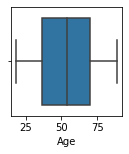

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


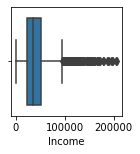

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


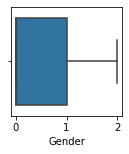

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


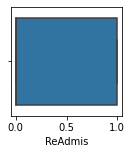

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


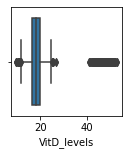

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


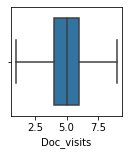

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


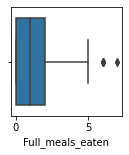

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


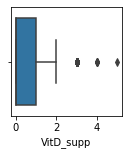

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


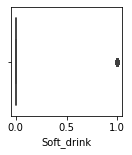

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


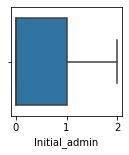

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


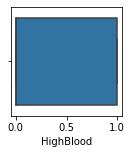

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


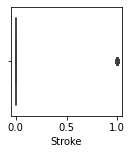

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


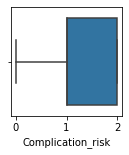

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


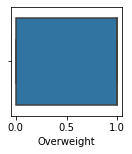

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


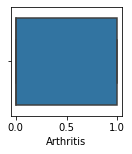

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


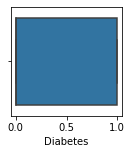

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


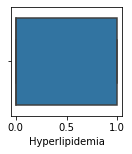

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


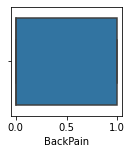

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


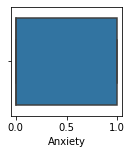

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


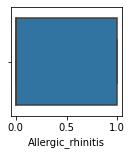

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


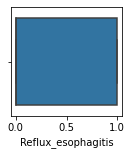

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


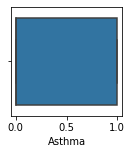

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


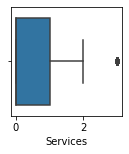

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


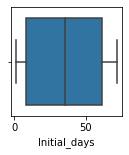

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


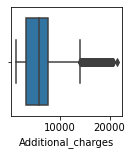

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


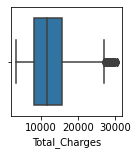

In [42]:
# df1  = df[['Zip',
#              'Lat',
#              'Lng',
#              'Population',
#              'Children',
#              'Age',
#              'Income',
#              'VitD_levels',
#              'Doc_visits',
#              'Full_meals_eaten',
#              'VitD_supp',
#              'Overweight',
#              'Anxiety',
#              'Initial_days',
#              'TotalCharge',
#              'Additional_charges','Item1',
#              'Item2',
#              'Item3',
#              'Item4',
#              'Item5',
#              'Item6',
#              'Item7',
#              'Item8']]
for i in df.columns:
    plt.figure(figsize=(2,2))
    sns.boxplot(df[i])
    plt.show()


C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


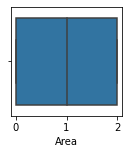

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


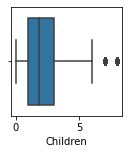

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


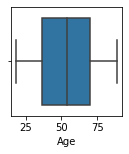

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


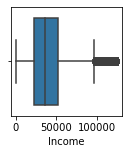

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


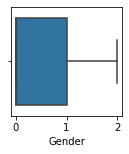

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


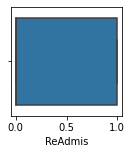

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


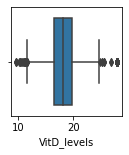

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


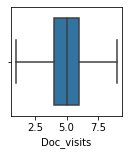

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


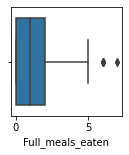

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


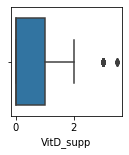

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


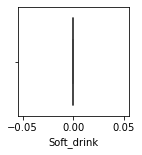

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


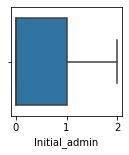

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


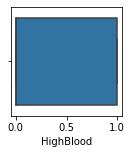

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


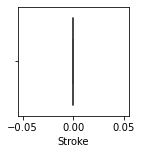

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


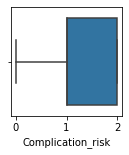

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


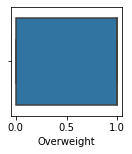

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


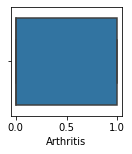

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


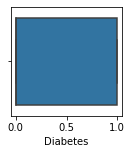

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


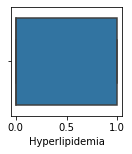

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


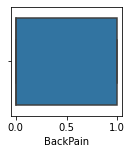

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


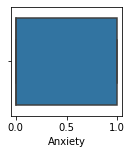

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


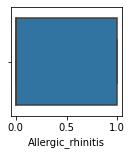

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


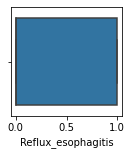

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


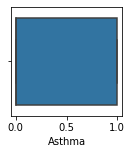

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


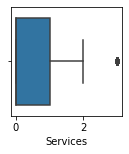

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


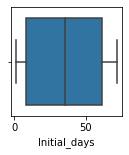

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


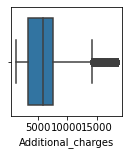

C:\anacondaaa\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


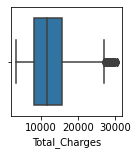

In [43]:
# df1  = df2[['Zip',
#              'Lat',
#              'Lng',
#              'Population',
#              'Children',
#              'Age',
#              'Income',
#              'VitD_levels',
#              'Doc_visits',
#              'Full_meals_eaten',
#              'VitD_supp',
#              'Overweight',
#              'Anxiety',
#              'Initial_days',
#              'TotalCharge',
#              'Additional_charges','Item1',
#              'Item2',
#              'Item3',
#              'Item4',
#              'Item5',
#              'Item6',
#              'Item7',
#              'Item8']]

for i in df.columns:
    q1=df[i].quantile(0.25)
    q3=df[i].quantile(0.75)
    iqr = q3-q1
    lt=q1-2.5*iqr
    ut=q3+2.5*iqr
    
    df.loc[df[i]<lt,i] = lt
    df.loc[df[i]>ut,i] = ut
    plt.figure(figsize = (2,2))
    sns.boxplot(df[i])
    plt.show()

# feature extraction

# pca

In [44]:
# x = df2.drop('TotalCharge',axis=1)
# y = df2['TotalCharge']

In [45]:
# pca = PCA(n_components=25,random_state=43)
# arr = pca.fit_transform(x)
# arr


In [46]:
# t1 = list('P'*25)
# t2 = list('c'*25)
# t3 = list(range(1,26))

# pca_list = []

# for i in range (0,25):
#     t=t1[i]+t2[i]+str(t3[i])
#     pca_list.append(t)
# pca_list    

In [47]:
# x_pca_df = pd.DataFrame(arr,columns =pca_list )
# x_pca_df

# linear regression

# assumption

# Linearity

In [48]:
x = df.drop('Total_Charges',axis=1)
y = df['Total_Charges']

In [49]:
x.shape

(10000, 27)

In [50]:
y.shape

(10000,)

In [51]:
# sns.pairplot(df)

In [52]:
df.corr()[27:]

,Area,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,...,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Additional_charges,Total_Charges
Total_Charges,-0.000536,0.009712,0.740262,-0.000969,0.008364,0.01362,0.018617,0.008072,0.018763,0.010348,...,-0.002475,0.014245,0.011763,0.016154,-0.011405,0.014083,0.016715,0.005584,0.02952,1.0


# independance

<AxesSubplot:>

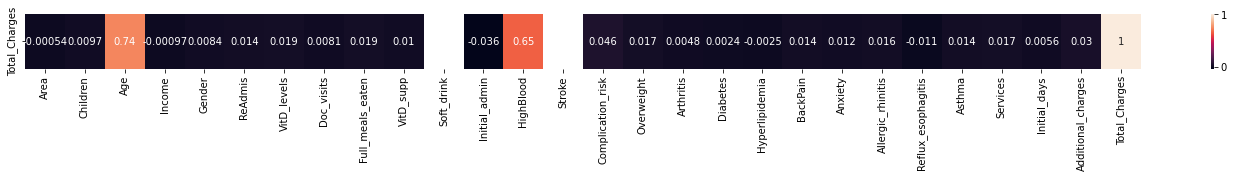

In [53]:
plt.figure(figsize=(25,1))
sns.heatmap(df.corr()[27:],annot = True)

# No multicolinearity

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
for i in range(len(df.columns)):
    vif = variance_inflation_factor(df,i)
    print('*************************************',"\nvif")
    print(f"{df.columns[i]} = {vif}")

************************************* 
vif
Area = 2.4713910385490436
************************************* 
vif
Children = 2.229761998229977
************************************* 
vif
Age = 41.59121700231933
************************************* 
vif
Income = 3.6133014378822
************************************* 
vif
Gender = 1.911154588691945
************************************* 
vif
ReAdmis = 5.624105026074362
************************************* 
vif
VitD_levels = 39.302458761037954
************************************* 
vif
Doc_visits = 19.251815357278165
************************************* 
vif
Full_meals_eaten = 1.9789937129415378
************************************* 
vif
VitD_supp = 1.4051148289053026
************************************* 
vif
Soft_drink = nan
************************************* 
vif
Initial_admin = 1.8364802046282227
************************************* 
vif
HighBlood = 6.972417099284339
************************************* 
vif
Stroke = nan


C:\anacondaaa\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


************************************* 
vif
Complication_risk = 3.3075306055431857
************************************* 
vif
Overweight = 3.5781221416637456
************************************* 
vif
Arthritis = 1.5524426059507581
************************************* 
vif
Diabetes = 1.3741950841227657
************************************* 
vif
Hyperlipidemia = 1.4988729234340936
************************************* 
vif
BackPain = 1.6914809957204637
************************************* 
vif
Anxiety = 1.5151155383955766
************************************* 
vif
Allergic_rhinitis = 1.6430215344992014
************************************* 
vif
Reflux_esophagitis = 1.6929271130645882
************************************* 
vif
Asthma = 1.4065528399751888
************************************* 
vif
Services = 1.6453510054467502
************************************* 
vif
Initial_days = 12.155225121189607
************************************* 
vif
Additional_charges = 12.6534777657409
*****

# model training

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=56)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((7000, 27), (3000, 27), (7000,), (3000,))

In [56]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [57]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# modeleval fun

In [58]:
def model_eval(x,y,model):
    y_pred = model.predict(x)
    R2_score = r2_score(y,y_pred)
    print(f'R2 SCORE = {R2_score}')
    print('*'*50)
    MSE = mean_squared_error(y,y_pred)
    print(f'MSE = {MSE}')
    print('*'*50)
    MAE = mean_absolute_error(y,y_pred)
    print(f'MAE= {MAE}')
    print('*'*50)

In [59]:
y_pred = lr.predict(x_test)
y_pred

array([10157.29811249,  6599.91389663, 23852.74746744, ...,
       12729.12762157,  3538.202234  ,  2487.29190182])

In [60]:
#training accuracy
model_eval(x_train,y_train,lr)

R2 SCORE = 0.8925947175076107
**************************************************
MSE = 4586400.15757208
**************************************************
MAE= 1629.1518178879594
**************************************************


In [61]:
# testing accuracy 
model_eval(x_test,y_test,lr)

R2 SCORE = 0.8870562050097356
**************************************************
MSE = 4856941.580618074
**************************************************
MAE= 1665.7852330942633
**************************************************


In [62]:
Training_acc = lr.score(x_train,y_train)
Testing_acc = lr.score(x_test,y_test)

In [63]:
acc_df = pd.DataFrame({'MODEL':'Linear_red','Traning_acc':Training_acc,'Testing_acc':Testing_acc,'Variance':[Training_acc-Testing_acc]})
acc_df

,MODEL,Traning_acc,Testing_acc,Variance
0,Linear_red,0.892595,0.887056,0.005539


# normality

In [64]:
residual = y_test - y_pred

<AxesSubplot:xlabel='Total_Charges', ylabel='Density'>

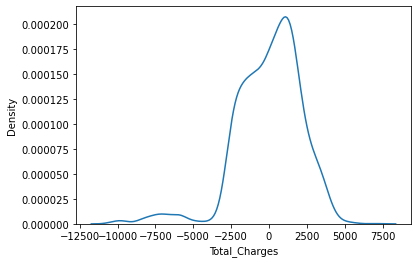

In [65]:
sns.kdeplot(residual)

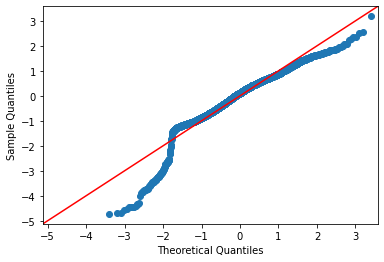

In [66]:
import statsmodels.api as sm
import scipy.stats as stats
sm.qqplot(residual,stats.norm,fit = True,line = '45')
plt.show()

In [67]:
stats,p_value = shapiro(residual)
if p_value > 0.05 :
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
else:
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 1.3247875287121173e-34
Residuals are not normally distributed


In [68]:
stats,p_value = kstest(residual,'norm')
if p_value > 0.05 :
    print(f"p_value = {p_value}")
    print(f"Residuals are normally distributed")
else:
    print(f"p_value = {p_value}")
    print(f"Residuals are not normally distributed")

p_value = 0.0
Residuals are not normally distributed


# KNN model

In [69]:
scale = MinMaxScaler()
arr = scale.fit_transform(x)
scale_df_x = pd.DataFrame(arr,columns=x.columns)
scale_df_x

,Area,Children,Age,Income,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,...,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,Additional_charges
0,0.5,0.125,0.492958,0.694807,0.5,0.0,0.448665,0.625,0.000000,0.000000,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.000000,0.135022,0.112051
1,1.0,0.375,0.464789,0.375068,0.0,0.0,0.513246,0.375,0.285714,0.285714,...,0.0,0.0,0.0,0.6,0.0,1.0,0.0,0.333333,0.199037,0.171362
2,0.5,0.375,0.492958,0.114293,0.0,0.0,0.427733,0.375,0.142857,0.000000,...,1.0,0.0,0.0,0.4,0.0,0.0,0.0,0.000000,0.053117,0.053343
3,0.5,0.000,0.845070,0.318271,0.5,0.0,0.427960,0.375,0.142857,0.000000,...,0.0,0.0,0.0,0.8,0.0,1.0,1.0,0.000000,0.010044,0.069999
4,0.0,0.175,0.056338,0.008486,0.0,0.0,0.398194,0.500,0.000000,0.571429,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.666667,0.003562,0.036432
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,1.0,0.200,0.098592,0.368327,0.5,0.0,0.377128,0.375,0.285714,0.285714,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.333333,0.712308,0.312496
9996,1.0,0.500,0.971831,0.119220,0.5,1.0,0.483833,0.500,0.000000,0.000000,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.953321,0.382026
9997,0.0,0.375,0.746479,0.528721,0.0,1.0,0.337650,0.375,0.285714,0.000000,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.333333,0.833685,0.374752
9998,0.0,0.375,0.352113,0.237559,0.5,1.0,0.673664,0.500,0.285714,0.285714,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.878492,0.417439


In [70]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(scale_df_x,y,train_size=0.7,random_state=45)

In [71]:
knn = KNeighborsRegressor()
knn.fit(x_train1,y_train1)

KNeighborsRegressor()

# Training eval

In [72]:
model_eval(x_train1,y_train1,knn)

R2 SCORE = 0.7387554237919118
**************************************************
MSE = 11327319.796777278
**************************************************
MAE= 2612.296664298057
**************************************************


# TESting eval

In [73]:
model_eval(x_test1,y_test1,knn)

R2 SCORE = 0.592262278660628
**************************************************
MSE = 16907480.54209382
**************************************************
MAE= 3194.0109330565997
**************************************************


In [74]:
# Training_acc 
Training_acc=knn.score(x_train1,y_train1)
Training_acc

0.7387554237919118

In [75]:
# Testing_acc
Testing_acc = knn.score(x_test1,y_test1)
Testing_acc

0.592262278660628

# Hyperparameter tunning

In [76]:
hyp_knn = KNeighborsRegressor()
hyp = {'n_neighbors': np.arange(2,20),'p':[1,2]}
rmsv = RandomizedSearchCV(hyp_knn,hyp)
rmsv.fit(x_train1,y_train1)
print(rmsv.best_estimator_)
hyp_knn=rmsv.best_estimator_
hyp_knn.fit(x_train1,y_train1)

KNeighborsRegressor(n_neighbors=14, p=1)


KNeighborsRegressor(n_neighbors=14, p=1)

In [77]:
# Training_acc 
Training_acc=hyp_knn.score(x_train1,y_train1)
Training_acc

0.7209540954103419

In [78]:
# # Testing_acc
Testing_acc = hyp_knn.score(x_test1,y_test1)
Testing_acc

0.6633018065036407

In [79]:
hyp_knn = KNeighborsRegressor()
hyp = {'n_neighbors': np.arange(2,20),'p':[1,2]}
gscv = GridSearchCV(hyp_knn,hyp)
gscv.fit(x_train1,y_train1)
print(gscv.best_estimator_)
hyp_knn=gscv.best_estimator_
hyp_knn.fit(x_train1,y_train1)

KNeighborsRegressor(n_neighbors=14, p=1)


KNeighborsRegressor(n_neighbors=14, p=1)

In [80]:
# Training_acc 
Training_acc=hyp_knn.score(x_train1,y_train1)
Training_acc

0.7209540954103419

In [81]:
# # Testing_acc
Testing_acc = hyp_knn.score(x_test1,y_test1)
Testing_acc

0.6633018065036407

In [82]:
acc_df.loc[1] =({'MODEL':'KNN','Traning_acc':Training_acc,'Testing_acc':Testing_acc,'Variance':[Training_acc-Testing_acc]})
acc_df

,MODEL,Traning_acc,Testing_acc,Variance
0,Linear_red,0.892595,0.887056,0.005539
1,KNN,0.720954,0.663302,[0.057652288906701266]


# Dtree

In [83]:
dt = DecisionTreeRegressor(random_state=45)
dt.fit(x_train,y_train)

DecisionTreeRegressor(random_state=45)

In [84]:
# training accuracy 

model_eval(x_train,y_train,dt)

R2 SCORE = 1.0
**************************************************
MSE = 5.6720956289350466e-27
**************************************************
MAE= 1.5591337744678769e-15
**************************************************


In [85]:
# testing accuracy 

model_eval(x_test,y_test,dt)

R2 SCORE = 0.888620739588149
**************************************************
MSE = 4789661.629126574
**************************************************
MAE= 919.8667572540002
**************************************************


# HYPERparameter tunning

In [86]:
hyp_dt = DecisionTreeRegressor()
hyp = {'criterion':["squared_error",'absolute_error'],
        'max_depth':np.arange(3,10),
        'min_samples_split':np.arange(2,10),
        'min_samples_leaf':np.arange(3,10)}
rscv_dt = RandomizedSearchCV(hyp_dt,hyp)
rscv_dt.fit(x_train,y_train)
rscv_dt.best_estimator_
hyp_dt = rscv_dt.best_estimator_
hyp_dt.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=8, min_samples_split=7)

In [87]:
# training accuracy 

model_eval(x_train,y_train,hyp_dt)

R2 SCORE = 0.9446565486823272
**************************************************
MSE = 2363265.641631205
**************************************************
MAE= 857.8149706828299
**************************************************


In [88]:
# testing accuracy 

model_eval(x_test,y_test,hyp_dt)

R2 SCORE = 0.9369431885250028
**************************************************
MSE = 2711642.9868547274
**************************************************
MAE= 884.5248087887209
**************************************************


In [89]:
# Training_acc 
Training_acc=hyp_dt.score(x_train,y_train)
print(f' training acc ={Training_acc}')
# # Testing_acc
Testing_acc = hyp_dt.score(x_test,y_test)
print(f' testing acc = {Testing_acc}')

 training acc =0.9446565486823272
 testing acc = 0.9369431885250028


In [90]:
acc_df.loc[2] =({'MODEL':'DTREE','Traning_acc':Training_acc,'Testing_acc':Testing_acc,'Variance':[Training_acc-Testing_acc]})
acc_df

,MODEL,Traning_acc,Testing_acc,Variance
0,Linear_red,0.892595,0.887056,0.005539
1,KNN,0.720954,0.663302,[0.057652288906701266]
2,DTREE,0.944657,0.936943,[0.007713360157324378]


# Random forest

In [91]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

# model eval

In [92]:
# training acc 

model_eval(x_train,y_train,rf)

R2 SCORE = 0.9927003627279769
**************************************************
MSE = 311707.7368796846
**************************************************
MAE= 279.1481209601184
**************************************************


In [93]:
# testing acc 

model_eval(x_test,y_test,rf)

R2 SCORE = 0.9400979760039241
**************************************************
MSE = 2575977.1144116535
**************************************************
MAE= 775.6795446172831
**************************************************


# Hyperparameter tunning

In [94]:
rf2 = RandomForestRegressor(random_state=45)
hype = {"criterion":['squared_error','absolute_error'],
       "max_depth":np.arange(2,10),
       "min_samples_leaf": np.arange(3,10),
       "min_samples_split":np.arange(2,20),
       "n_estimators":np.arange(50,100)}
rscv_rf = RandomizedSearchCV(rf2,hype)
rscv_rf.fit(x_train,y_train)
rscv_rf.best_estimator_
rf2 = rscv_rf.best_estimator_
rf2.fit(x_train,y_train)

RandomForestRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=3, min_samples_split=3, n_estimators=74,
                      random_state=45)

# model eval

In [95]:
# training accuracy 

model_eval(x_train,y_train,rf2)

R2 SCORE = 0.9648406944032515
**************************************************
MSE = 1501366.0500402183
**************************************************
MAE= 497.1376312218204
**************************************************


In [96]:
# testing accuracy 

model_eval(x_test,y_test,rf2)

R2 SCORE = 0.9425330714878192
**************************************************
MSE = 2471260.2814990976
**************************************************
MAE= 665.6118953243175
**************************************************


In [97]:
# Training_acc 
Training_acc=rf2.score(x_train,y_train)
print(f' training acc ={Training_acc}')
# # Testing_acc
Testing_acc = rf2.score(x_test,y_test)
print(f' testing acc = {Testing_acc}')

 training acc =0.9648406944032515
 testing acc = 0.9425330714878192


In [98]:
acc_df.loc[3] =({'MODEL':'Random Forest','Traning_acc':Training_acc,'Testing_acc':Testing_acc,'Variance':[Training_acc-Testing_acc]})
acc_df

,MODEL,Traning_acc,Testing_acc,Variance
0,Linear_red,0.892595,0.887056,0.005539
1,KNN,0.720954,0.663302,[0.057652288906701266]
2,DTREE,0.944657,0.936943,[0.007713360157324378]
3,Random Forest,0.964841,0.942533,[0.022307622915432312]


# feature selection

In [99]:
rf2.feature_importances_

array([3.97738969e-04, 1.56884486e-03, 6.23268998e-01, 3.17737336e-03,
       4.00806942e-04, 1.13137090e-04, 2.53079703e-03, 6.46080971e-04,
       5.95173240e-04, 6.44379864e-04, 0.00000000e+00, 9.87839850e-03,
       3.40721864e-01, 0.00000000e+00, 7.71561674e-03, 3.00098611e-04,
       2.07646270e-04, 2.63190258e-04, 2.12642813e-04, 2.23119841e-04,
       4.90968127e-04, 2.31643351e-04, 2.14309183e-04, 1.99740660e-04,
       5.97774316e-04, 2.63429817e-03, 2.76535865e-03])

In [100]:
s = pd.Series(rf2.feature_importances_,index=x.columns)
s.sort_values()

Stroke                0.000000
Soft_drink            0.000000
ReAdmis               0.000113
Asthma                0.000200
Arthritis             0.000208
Hyperlipidemia        0.000213
Reflux_esophagitis    0.000214
BackPain              0.000223
Allergic_rhinitis     0.000232
Diabetes              0.000263
Overweight            0.000300
Area                  0.000398
Gender                0.000401
Anxiety               0.000491
Full_meals_eaten      0.000595
Services              0.000598
VitD_supp             0.000644
Doc_visits            0.000646
Children              0.001569
VitD_levels           0.002531
Initial_days          0.002634
Additional_charges    0.002765
Income                0.003177
Complication_risk     0.007716
Initial_admin         0.009878
HighBlood             0.340722
Age                   0.623269
dtype: float64

In [101]:
df2 = x.drop(['Stroke','Soft_drink','ReAdmis','Reflux_esophagitis','Allergic_rhinitis','Diabetes','Hyperlipidemia','Asthma','Arthritis','Gender'],axis=1)

In [102]:
df2

,Area,Children,Age,Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Initial_admin,HighBlood,Complication_risk,Overweight,BackPain,Anxiety,Services,Initial_days,Additional_charges
0,1.0,1.0,53.0,86575.93,17.802330,6.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,10.585770,3191.048774
1,2.0,3.0,51.0,46805.99,18.994640,4.0,2.0,1.0,0.0,1.0,2.0,1.0,0.0,0.6,1.0,15.129562,4214.905346
2,1.0,3.0,53.0,14370.14,17.415889,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.4,0.0,4.772177,2177.586768
3,1.0,0.0,78.0,39741.49,17.420079,4.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.8,0.0,1.714879,2465.118965
4,0.0,1.4,22.0,1209.56,16.870524,5.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,1.254807,1885.655137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2.0,1.6,25.0,45967.61,16.481612,4.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,51.561217,6651.241294
9996,2.0,4.0,87.0,14983.02,18.451601,5.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,68.668237,7851.522660
9997,0.0,3.0,71.0,65917.81,15.752751,4.0,2.0,0.0,1.0,1.0,2.0,1.0,0.0,1.0,1.0,60.176523,7725.953391
9998,0.0,3.0,43.0,29702.32,21.956305,5.0,2.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,63.356903,8462.831883


In [103]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(df2,y,train_size=0.7,random_state=45)

In [104]:
x_train2.shape,x_test2.shape,y_train2.shape,y_test2.shape

((7000, 17), (3000, 17), (7000,), (3000,))

In [105]:
rf3 = RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=95, random_state=45)
rf3.fit(x_train2,y_train2)

RandomForestRegressor(max_depth=7, min_samples_leaf=5, min_samples_split=13,
                      n_estimators=95, random_state=45)

# training accuracy

In [106]:
model_eval(x_train2,y_train2,rf3)

R2 SCORE = 0.958505518129782
**************************************************
MSE = 1799161.8152146882
**************************************************
MAE= 701.7207243120433
**************************************************


# testing accuracy

In [107]:
model_eval(x_test2,y_test2,rf3)

R2 SCORE = 0.9392940399543722
**************************************************
MSE = 2517267.3131370298
**************************************************
MAE= 789.8645637626514
**************************************************


In [108]:
# Training_acc 
Training_acc=rf3.score(x_train2,y_train2)
print(f' training acc ={Training_acc}')
# # Testing_acc
Testing_acc = rf3.score(x_test2,y_test2)
print(f' testing acc = {Testing_acc}')

 training acc =0.958505518129782
 testing acc = 0.9392940399543722


In [109]:
acc_df.loc[4] =({'MODEL':'Random Forest After Feature selection','Traning_acc':Training_acc,'Testing_acc':Testing_acc,'Variance':[Training_acc-Testing_acc]})
acc_df

,MODEL,Traning_acc,Testing_acc,Variance
0,Linear_red,0.892595,0.887056,0.005539
1,KNN,0.720954,0.663302,[0.057652288906701266]
2,DTREE,0.944657,0.936943,[0.007713360157324378]
3,Random Forest,0.964841,0.942533,[0.022307622915432312]
4,Random Forest After Feature selection,0.958506,0.939294,[0.019211478175409802]


# Hyperparameter tunning

In [110]:
final_rf = RandomForestRegressor(random_state=45)
hype = {"criterion":['squared_error','absolute_error'],
       "max_depth":np.arange(2,10),
       "min_samples_leaf": np.arange(3,10),
       "min_samples_split":np.arange(2,20),
       "n_estimators":np.arange(50,100)}
rscv_rf = RandomizedSearchCV(final_rf,hype)
rscv_rf.fit(x_train2,y_train2)
rscv_rf.best_estimator_
final_rf = rscv_rf.best_estimator_
final_rf.fit(x_train2,y_train2)

RandomForestRegressor(max_depth=8, min_samples_leaf=5, min_samples_split=10,
                      n_estimators=69, random_state=45)

# training accuracy

In [111]:
model_eval(x_train2,y_train2,final_rf)

R2 SCORE = 0.9638651217274213
**************************************************
MSE = 1566774.4301228663
**************************************************
MAE= 643.1045134399641
**************************************************


# testing accuracy

In [112]:
model_eval(x_test2,y_test2,final_rf)

R2 SCORE = 0.9395732791825321
**************************************************
MSE = 2505688.223026864
**************************************************
MAE= 775.9277685796038
**************************************************


In [113]:
# Training_acc 
Training_acc=final_rf.score(x_train2,y_train2)
print(f' training acc ={Training_acc}')
# # Testing_acc
Testing_acc = final_rf.score(x_test2,y_test2)
print(f' testing acc = {Testing_acc}')

 training acc =0.9638651217274213
 testing acc = 0.9395732791825321


In [114]:
acc_df.loc[5] =({'MODEL':'Final Random Forest After Hyper params','Traning_acc':Training_acc,'Testing_acc':Testing_acc,'Variance':[Training_acc-Testing_acc]})
acc_df

,MODEL,Traning_acc,Testing_acc,Variance
0,Linear_red,0.892595,0.887056,0.005539
1,KNN,0.720954,0.663302,[0.057652288906701266]
2,DTREE,0.944657,0.936943,[0.007713360157324378]
3,Random Forest,0.964841,0.942533,[0.022307622915432312]
4,Random Forest After Feature selection,0.958506,0.939294,[0.019211478175409802]
5,Final Random Forest After Hyper params,0.963865,0.939573,[0.024291842544889253]


# AdaBoost

In [115]:
ada = AdaBoostRegressor(random_state=45)
ada.fit(x_train,y_train)

AdaBoostRegressor(random_state=45)

# model eval

In [116]:
# training accuracy 

model_eval(x_train,y_train,ada)

R2 SCORE = 0.8807275183758753
**************************************************
MSE = 5093151.061295899
**************************************************
MAE= 1698.143008107743
**************************************************


In [117]:
# testing accuracy 

model_eval(x_test,y_test,ada)

R2 SCORE = 0.8750347505400007
**************************************************
MSE = 5373902.269592578
**************************************************
MAE= 1724.812266352511
**************************************************


# Hyperparameter tunning

In [118]:
ada1 = AdaBoostRegressor(random_state  = 45)
hype = {"n_estimators":np.arange(50,100),
       "learning_rate":np.arange(0.1,1.1,0.1)}
rscv = RandomizedSearchCV(ada1,hype)
rscv.fit(x_train,y_train)
rscv.best_estimator_
ada1 = rscv.best_estimator_
ada1.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.1, n_estimators=59, random_state=45)

In [119]:
# training accuracy 

model_eval(x_train,y_train,ada1)

R2 SCORE = 0.9113715241592651
**************************************************
MSE = 3784596.4940329897
**************************************************
MAE= 1414.6116296722748
**************************************************


In [120]:
# testing accuracy 

model_eval(x_test,y_test,ada1)

R2 SCORE = 0.9060535957216519
**************************************************
MSE = 4039993.497016781
**************************************************
MAE= 1433.715193168268
**************************************************


In [121]:
# Training_acc 
Training_acc=ada1.score(x_train,y_train)
print(f' training acc ={Training_acc}')
# # Testing_acc
Testing_acc = ada1.score(x_test,y_test)
print(f' testing acc = {Testing_acc}')

 training acc =0.9113715241592651
 testing acc = 0.9060535957216519


In [122]:
acc_df.loc[5] =({'MODEL':'AdaBoost','Traning_acc':Training_acc,'Testing_acc':Testing_acc,'Variance':[Training_acc-Testing_acc]})
acc_df

,MODEL,Traning_acc,Testing_acc,Variance
0,Linear_red,0.892595,0.887056,0.005539
1,KNN,0.720954,0.663302,[0.057652288906701266]
2,DTREE,0.944657,0.936943,[0.007713360157324378]
3,Random Forest,0.964841,0.942533,[0.022307622915432312]
4,Random Forest After Feature selection,0.958506,0.939294,[0.019211478175409802]
5,AdaBoost,0.911372,0.906054,[0.005317928437613251]


# Serialisation

# user defined function

In [127]:
import json

patient_data = { 'columns':df2.columns.to_numpy().tolist(),
               
                'Area':{'Rural':0, 'Suburban': 1, 'Urban': 2},
                
#                 'Employment':{'Full Time': 3,
#                          'Student': 0,
#                          'Part Time': 1,
#                          'Unemployed': 2,
#                          'Retired': 4},

#                 'Marital':{'Widowed': 3,
#                          'Married': 1,
#                          'Separated': 2,
#                          'Never Married': 0,
#                          'Divorced': 2},

#                 'Gender':{'Female': 0, 'Male': 1, 'Prefer not to answer': 2},

#                 'ReAdmis':{'No': 0, 'Yes': 1},

#                 'Soft_drink':{'No': 0, 'Yes': 1},

                'Initial_admin':{'Emergency Admission': 0,
                         'Elective Admission': 1,
                         'Observation Admission': 2},


                'HighBlood':{'No': 0, 'Yes': 1},

#                 'Stroke':{'No': 0, 'Yes': 1},

                'Complication_risk':{'Medium': 1, 'High': 2, 'Low': 0},


#                 'Arthritis':{'No': 0, 'Yes': 1},

#                 'Diabetes':{'No': 0, 'Yes': 1},

#                 'Hyperlipidemia':{'No': 0, 'Yes': 1},

                'BackPain':{'No': 0, 'Yes': 1},

#                 'Allergic_rhinitis':{'No': 0, 'Yes': 1},

#                 'Reflux_esophagitis':{'No': 0, 'Yes': 1},


#                 'Asthma':{'No': 0, 'Yes': 1},


                'Services':{'Blood Work': 0, 'Intravenous': 1, 'CT Scan': 2, 'MRI': 3}
               }
with open('patient_data.json','w') as file:
    json.dump(patient_data,file)

In [128]:
import pickle

with open('rf_model.pkl','wb') as file:
    pickle.dump(final_rf,file)

In [129]:
# with open('pca.pkl','wb') as file:
#     pickle.dump(pca,file)

In [130]:

user_data = np.zeros(len(df2.columns.tolist()))
Area = str(input('Area:'))                         
Children = eval(input('Children:'))             
Age = eval(input('Age:'))                                      
Income = eval(input('Income:'))                         
# Gender = eval(input('Gender:'))                
# ReAdmis = eval(input('ReAdmis:'))               
VitD_levels = eval(input('VitD_levels:'))          
Doc_visits = eval(input('Doc_visits:'))            
Full_meals_eaten = eval(input('Full_meals_eaten:'))      
VitD_supp = eval(input('VitD_supp:'))            
# Soft_drink = eval(input('Soft_drink:'))           
Initial_admin = str(input('Initial_admin:'))         
HighBlood = str(input('HighBlood:'))             
# Stroke = eval(input('Stroke:'))               
Complication_risk = str(input('Complication_risk:'))     
Overweight = eval(input('Overweight:'))           
# Arthritis = eval(input('Arthritis:'))             
# Diabetes = eval(input('Diabetes:'))              
# Hyperlipidemia = eval(input('Hyperlipidemia:'))        
BackPain = str(input('BackPain:'))              
Anxiety = eval(input('Anxiety:'))               
# Allergic_rhinitis = eval(input('Allergic_rhinitis:'))     
# Reflux_esophagitis = eval(input('Reflux_esophagitis:'))   
# Asthma = eval(input('Asthma:'))                
Services = str(input('Services:'))              
Initial_days = eval(input('Initial_days:'))          
Additional_charges = eval(input('Additional_charges:'))  






user_data[0] = patient_data['Area'][Area]
user_data[1] = Children
user_data[2] = Age
user_data[3] = Income
# user_data[4] = user_data['Gender'][Gender]
# user_data[5] = user_data['ReAdmis'][ReAdmis]
user_data[4] = VitD_levels
user_data[5] = Doc_visits
user_data[6] = Full_meals_eaten
user_data[7] = VitD_supp
# user_data[10] = user_data['Soft_drink'][Soft_drink]
user_data[8] = patient_data['Initial_admin'][Initial_admin]
user_data[9] = patient_data['HighBlood'][HighBlood]
# user_data[13] = user_data['Stroke'][Stroke]
user_data[10] = patient_data['Complication_risk'][Complication_risk]
user_data[11] = Overweight
# user_data[16] = user_data['Arthritis'][Arthritis]
# user_data[17] = user_data['Diabetes'][Diabetes]
# user_data[18] = user_data['Hyperlipidemia'][Hyperlipidemia]
user_data[12] = patient_data['BackPain'][BackPain]
user_data[13] = Anxiety
# user_data[21] = user_data['Allergic_rhinitis'][Allergic_rhinitis]
# user_data[22] = user_data['Reflux_esophagitis'][Reflux_esophagitis]
# user_data[23] = user_data['Asthma'][Asthma]
user_data[14] = patient_data['Services'][Services]
user_data[15] = Initial_days
user_data[16] = Additional_charges

result = final_rf.predict([user_data])
result[0]




Area:Urban
Children:0
Age:25
Income:25000
VitD_levels:15
Doc_visits:2
Full_meals_eaten:4
VitD_supp:2
Initial_admin:Emergency Admission
HighBlood:No
Complication_risk:Medium
Overweight:0
BackPain:No
Anxiety:0.8
Services:Blood Work
Initial_days:2
Additional_charges:800


C:\anacondaaa\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


4903.327882386088

In [ ]:
# Area:"Urban"
# Children:2
# Age:48
# Income:45000
# VitD_levels:15
# Doc_visits:2
# Full_meals_eaten:2
# VitD_supp:2
# Initial_admin:"Elective Admission"
# HighBlood:"Yes"
# Complication_risk:"Medium"
# Overweight:1.0
# BackPain:"Yes"
# Anxiety:0.8
# Services:"Blood Work"
# Initial_days:2
# Additional_charges:1500

In [ ]:
# user_data = np.zeros(len(df2.columns.tolist()))






# user_data[0] = patient_data['Area'][Area]
# user_data[1] = Children
# user_data[2] = Age
# user_data[3] = Income
# # user_data[4] = user_data['Gender'][Gender]
# # user_data[5] = user_data['ReAdmis'][ReAdmis]
# user_data[4] = VitD_levels
# user_data[5] = Doc_visits
# user_data[6] = Full_meals_eaten
# user_data[7] = VitD_supp
# # user_data[10] = user_data['Soft_drink'][Soft_drink]
# user_data[8] = patient_data['Initial_admin'][Initial_admin]
# user_data[9] = patient_data['HighBlood'][HighBlood]
# # user_data[13] = user_data['Stroke'][Stroke]
# user_data[10] = patient_data['Complication_risk'][Complication_risk]
# user_data[11] = Overweight
# # user_data[16] = user_data['Arthritis'][Arthritis]
# # user_data[17] = user_data['Diabetes'][Diabetes]
# # user_data[18] = user_data['Hyperlipidemia'][Hyperlipidemia]
# user_data[12] = patient_data['BackPain'][BackPain]
# user_data[13] = Anxiety
# # user_data[21] = user_data['Allergic_rhinitis'][Allergic_rhinitis]
# # user_data[22] = user_data['Reflux_esophagitis'][Reflux_esophagitis]
# # user_data[23] = user_data['Asthma'][Asthma]
# user_data[14] = patient_data['Services'][Services]
# user_data[15] = Initial_days
# user_data[16] = Additional_charges

# result = final_rf.predict([user_data])
# result[0]

